In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import rcParams, cm
from scipy.optimize import newton
import scipy.constants as sc

In [3]:
z = np.linspace(0, 10, int(1e4))

def zgen(z_s):
    return np.linspace(0, z_s, int(1e4))

def zgen2(z_s):
    return np.linspace(0, z_s*100, int(1e4))

def regime(u0, eta):
    if (np.log(u0) + 0.5 + 1/eta>0):
        return 'i'
    else:
        return 'ii'

def fsolve(a, z_s):
    f = lambda u, k: 0.5 * ( u**2 - 1 ) - np.log( u ) + k
    fder = lambda u, k: u - 1/u
    k_list = lambda a: 1/a * ( (1 + a*z_s**2)**(-0.5) - ( 1 + a*z**2 )**(-0.5) )
    ug = lambda a: np.exp(k_list(a))
    return newton(f, ug(a), args=(k_list(a),), fprime=fder, maxiter=1000, tol=1e-10)

def fsolve2(a, z_s):
    f = lambda u, k: 0.5 * ( u**2 - 1 ) - np.log( u ) + k
    fder = lambda u, k: u - 1/u
    k_list = lambda a: 1/a * ( (1 + a*z_s**2)**(-0.5) - ( 1 + a*z**2 )**(-0.5) )
    ug = 1.2
    return newton(f, ug, args=(k_list(a)[0],), fprime=fder, maxiter=1000, tol=1e-10)

def gsolve(a, z_s):
    u0 = fsolve(a, z_s)[0][0]
    print(u0)
    g = lambda u, k: 0.5 * ( u**2 - u0**2 ) - np.log( u/u0 ) + k
    gder = lambda u, k: u - 1/u
    k_list = lambda a: 1/a * ( 1 - ( 1 + a*z**2 )**(-0.5) )
    ug = u0 * np.exp(k_list(a))
    return newton(g, ug, args=(k_list(a),), fprime=gder, maxiter=1000, tol=1e-10)

def gsolve2(z, a, u0):
    g = lambda u, k: 0.5 * ( u**2 - u0**2 ) - np.log( u/u0 ) + k
    gder = lambda u, k: u - 1/u
    k_list = lambda a: 1/a * ( 1 - ( 1 + a*z**2 )**(-0.5) )
    ug = u0 * np.exp(k_list(a))
    return newton(g, ug, args=(k_list(a),), fprime=gder, maxiter=1000, tol=1e-10)

def gsolve3(a, u0):
    g = lambda u: 0.5 * ( u**2 - u0**2 ) - np.log( u/u0 ) + 1/a
    gder = lambda u: u - 1/u
    ug = u0 * np.exp(1/a)
    return newton(g, ug, fprime=gder, maxiter=1000, tol=1e-10)


def gsolve4(a):
    g = lambda u0: 0.5 * ( u0**2 - 1 ) - np.log( u0 ) - 1/a
    gder = lambda u0: u0 - 1/u0
    ug = np.exp(-1/a - 1/2) # guess for subsonic u0
    return newton(g, ug, fprime=gder, maxiter=1000, tol=1e-10)

def gsolve5(a):
    g = lambda u0: 0.5 * ( u0**2 - 1 ) - np.log( u0 ) - 1/a
    gder = lambda u0: u0 - 1/u0
    ug = 1.1 # guess for supersonic u0
    return newton(g, ug, fprime=gder, maxiter=1000, tol=1e-10)

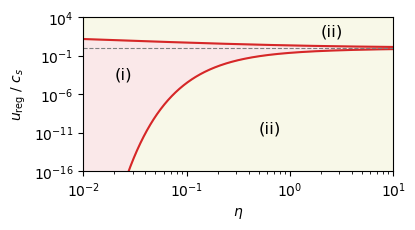

In [ ]:
rcParams['figure.figsize'] = (4,2)
eta_list = 10**np.linspace(-2, 2, 1000)
y1 = [gsolve4(i) for i in eta_list]
y2 = [gsolve5(i) for i in eta_list]
plt.plot(eta_list, y1, color='C3')
plt.plot(eta_list, y2, color='C3')
plt.axhline(1, color='C7', linestyle='--', lw=0.8)
plt.fill_between(eta_list, y1, color='C8', alpha=0.1)
plt.fill_between(eta_list, 1e4, y2, color='C8', alpha=0.1)
plt.fill_between(eta_list, y2, y1, color='C3', alpha=0.1)
plt.text(2, 4e1, r'(ii)', fontsize=12)
plt.text(5e-1, 1e-11, r'(ii)', fontsize=12)
plt.text(2e-2, 1e-4, r'(i)', fontsize=12)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\eta$')
plt.ylabel(r'$u_\mathrm{reg}$ / $c_s$')
plt.xlim(10**(-2),1e1)
plt.ylim(1e-16, 1e4)

[-3.3155105579642736, -1.0129254649702286, 1.2896596280238182, 3.592244721017863, 5.894829814011909]
Sonic point [8.998344525315103, 31.058682725044672, 24.315482080710673, 8.215475508587323, 4.333391212183266]
Regime change at 2.7536449349747158e-05
u0 approximation [3.7906435976058805, 4.355932629180523, 4.291932053743671, 3.7169223233697357, 3.0348707339812977]
u0 actual [4.149065578953196, 4.697689947704381, 4.635534915681024, 4.077561767204305, 3.4157318259963962]


Text(0.5, 1.0, 'Gas velocities, $\\eta = 0.1$')

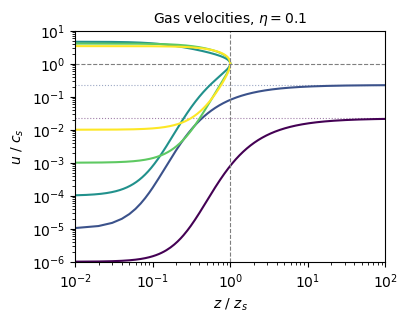

In [ ]:
rcParams['figure.figsize'] = (4,3)
eta = 1e-1
u0 = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
print([np.log(i) + 0.5 + 1/eta for i in u0]) # checks which regime
z_s = [(1/eta * ( (0.5*eta + eta*np.log(i) - 0.5*eta*i**2 + 1)**(-2) - 1 ) )**0.5 for i in u0]
print('Sonic point', z_s)
print('Regime change at', np.exp(-0.5 - 1/eta))
print('u0 approximation', [( 1 + 2/eta * (1 - (1+eta*i**2)**(-0.5)) )**(0.5) for i in z_s])
print('u0 actual', [fsolve2(eta, i) for i in z_s])

color = cm.viridis(np.linspace(0,1,len(u0)))

plt.axhline(gsolve3(eta, u0[0]), c=color[0], ls=':', lw=0.8, alpha=0.5)
plt.axhline(gsolve3(eta, u0[1]), c=color[1], ls=':', lw=0.8, alpha=0.5)
plt.plot(zgen2(z_s[0])/z_s[0], gsolve2(zgen2(z_s[0]), eta, u0[0]), c=color[0])
plt.plot(zgen2(z_s[1])/z_s[1], gsolve2(zgen2(z_s[1]), eta, u0[1]), c=color[1])
plt.plot(zgen(z_s[2])/z_s[2], gsolve2(zgen(z_s[2]), eta, u0[2]), c=color[2])
plt.plot(zgen(z_s[2])/z_s[2], gsolve2(zgen(z_s[2]), eta, fsolve2(eta, z_s[2])), c=color[2])
plt.plot(zgen(z_s[3])/z_s[3], gsolve2(zgen(z_s[3]), eta, u0[3]), c=color[3])
plt.plot(zgen(z_s[3])/z_s[3], gsolve2(zgen(z_s[3]), eta, fsolve2(eta, z_s[3])), c=color[3])
plt.plot(zgen(z_s[4])/z_s[4], gsolve2(zgen(z_s[4]), eta, u0[4]), c=color[4])
plt.plot(zgen(z_s[4])/z_s[4], gsolve2(zgen(z_s[4]), eta, fsolve2(eta, z_s[4])), c=color[4])

plt.xscale('log')
plt.yscale('log')
plt.axhline(1, c='C7', ls='--', lw=0.8)
plt.axvline(1, c='C7', ls='--', lw=0.8)
plt.xlim(1e-2,1e2)
plt.ylim(1e-6,1e1)
plt.xlabel(r'$z$ / $z_s$')
plt.ylabel(r'$u$ / $c_s$')
plt.title(r'Gas velocities, $\eta = 0.1$', fontsize=10)

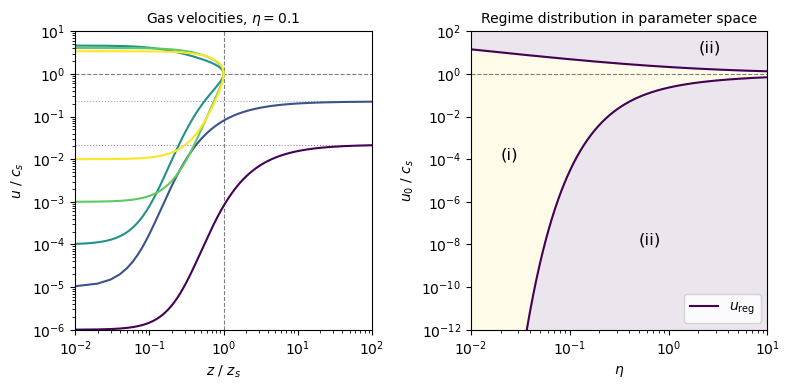

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
eta = 1e-1
u0 = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
z_s = [(1/eta * ( (0.5*eta + eta*np.log(i) - 0.5*eta*i**2 + 1)**(-2) - 1 ) )**0.5 for i in u0]

color = cm.viridis(np.linspace(0,1,len(u0)))

ax1.axhline(1, c='C7', ls='--', lw=0.8)
ax1.axvline(1, c='C7', ls='--', lw=0.8)
ax1.axhline(gsolve3(eta, u0[0]), c=color[0], ls=':', lw=0.8, alpha=0.5)
ax1.axhline(gsolve3(eta, u0[1]), c=color[1], ls=':', lw=0.8, alpha=0.5)
ax1.plot(zgen2(z_s[0])/z_s[0], gsolve2(zgen2(z_s[0]), eta, u0[0]), c=color[0])
ax1.plot(zgen2(z_s[1])/z_s[1], gsolve2(zgen2(z_s[1]), eta, u0[1]), c=color[1])
ax1.plot(zgen(z_s[2])/z_s[2], gsolve2(zgen(z_s[2]), eta, u0[2]), c=color[2])
ax1.plot(zgen(z_s[2])/z_s[2], gsolve2(zgen(z_s[2]), eta, fsolve2(eta, z_s[2])), c=color[2])
ax1.plot(zgen(z_s[3])/z_s[3], gsolve2(zgen(z_s[3]), eta, u0[3]), c=color[3])
ax1.plot(zgen(z_s[3])/z_s[3], gsolve2(zgen(z_s[3]), eta, fsolve2(eta, z_s[3])), c=color[3])
ax1.plot(zgen(z_s[4])/z_s[4], gsolve2(zgen(z_s[4]), eta, u0[4]), c=color[4])
ax1.plot(zgen(z_s[4])/z_s[4], gsolve2(zgen(z_s[4]), eta, fsolve2(eta, z_s[4])), c=color[4])

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(1e-2,1e2)
ax1.set_ylim(1e-6,1e1)
ax1.set_xlabel(r'$z$ / $z_s$')
ax1.set_ylabel(r'$u$ / $c_s$')
ax1.set_title(r'Gas velocities, $\eta = 0.1$', fontsize=10)

eta_list = 10**np.linspace(-2, 2, 1000)
y1 = [gsolve4(i) for i in eta_list]
y2 = [gsolve5(i) for i in eta_list]
ax2.plot(eta_list, y1, color=color[0], label=r'$u_\mathrm{reg}$')
ax2.plot(eta_list, y2, color=color[0])
ax2.axhline(1, color='C7', linestyle='--', lw=0.8)
ax2.fill_between(eta_list, y1, color=color[0], alpha=0.1)
ax2.fill_between(eta_list, 1e4, y2, color=color[0], alpha=0.1)
ax2.fill_between(eta_list, y2, y1, color=color[-1], alpha=0.1)
ax2.text(2, 1e1, r'(ii)', fontsize=12)
ax2.text(5e-1, 1e-8, r'(ii)', fontsize=12)
ax2.text(2e-2, 1e-4, r'(i)', fontsize=12)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel(r'$\eta$')
ax2.set_ylabel(r'$u_0$ / $c_s$')
ax2.set_xlim(10**(-2),1e1)
ax2.set_ylim(1e-12, 1e2)
ax2.set_title(r'Regime distribution in parameter space', fontsize=10)
ax2.legend()

fig.tight_layout()
plt.savefig('/data/jhyl3/graphics/gas_vel.pdf', dpi=300, bbox_inches='tight')

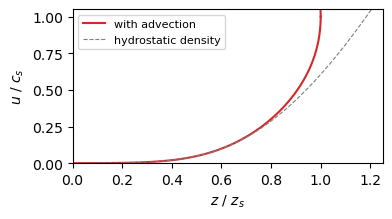

In [4]:
# hydrostatic equilibrium comparison

rcParams['figure.figsize'] = (4,2)
eta = 0.1
u0 = 1e-3
z_s = (1/eta * ( (0.5*eta + eta*np.log(u0) - 0.5*eta*u0**2 + 1)**(-2) - 1 ) )**0.5
z = zgen(z_s)

plt.plot(z/z_s, gsolve2(z, eta, u0), c='C3', label='with advection')
plt.plot(z/z_s, gsolve2(z, eta, fsolve2(eta, z_s)), c='C3')
plt.plot(zgen2(z_s)/z_s, u0 * np.exp(1/eta * ( 1 - (1 + eta*zgen2(z_s)**2)**(-0.5) ) ), c='C7', ls='--', lw=0.8, label='hydrostatic density')
plt.xlim(0, 1.25)
plt.ylim(0, 1.05)
plt.xlabel(r'$z$ / $z_s$')
plt.ylabel(r'$u$ / $c_s$')
plt.legend(loc='upper left', fontsize=8)
plt.savefig('/data/jhyl3/graphics/gas_hyd_comp.pdf', dpi=300, bbox_inches='tight')